In [1]:
import os
import gym
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from gym import wrappers
from datetime import datetime
import time
from q_learning_bins import plot_running_avg

## test train NN with 1 day simulation, Et Ini = 0.0, one episode with separate 1 day simulation for validation

In [2]:
# test train with 1 day simulation NN, Et Ini = 0.0
from baselines import deepq
import baselines.common.tf_util as U
#from SimpleBatteryModelDefnoCappenalty import SimpleBatterySimEnv
#from SimpleBatteryModelDefnoCappenaltyMultiDay import SimpleBatterySimEnv
#from SimpleBatteryModelnoCapAllpriceDef import SimpleBatterySimEnv
from SimpleBatteryModelFinalDef import SimpleBatterySimEnv as SimpleBatterySimEnvNew

def testwith1dayNNseparate1dayvaliation(istartday, Etini, etap, etan, nsimudays, npriceday, traindays):
    tf.reset_default_graph()
    
    Lmpfile = '../../TestData/2017_Zonal_LMP_LONGIL.csv'
    #istartday = 12
    
    env = SimpleBatterySimEnvNew(Lmpfile, Etini, etap, etan, istartday, nsimudays, npriceday, traindays)
    
    # this model "simplebattery_model_nolastpenalty_simu1days_smalltrainset4_lr_0.0001_100w.pkl" use old 1 day method to train
    # the training does not train the next two days when given the istarday
    #nn_model = "./previous_model/simplebattery_model_nolastpenalty_BaEtIni0.0_simu1Days_price1Days_extendsetdays_smalltrainset4_lr_0.0001_100w.pkl"
    #nn_model = ("./previous_model/simplebattery_model_etap0.9_etan0.81_BaEtIni0.0_simu1Days_price1Days"
    #+"_extendsetdays_Moredataset4_lr_0.0001_100w.pkl")
    nn_model = ("./previous_model/ubuntu3/simplebattery_model_etap0.9_etan0.81_BaEtIni0.0_simu1Days"+
                "_price1Days_extendsetdays_Moredataset4_lr_0.00025_200w.pkl")
    act = deepq.load(nn_model)
    
    with tf.variable_scope("deepq", reuse=True):
        eps = tf.get_variable("eps")
            
    U.set_value(eps, 0)
    print("Check epsilon is: %f" % U.eval(eps))

    #obs, done = env._validate(1,8,1.0,0.58), False
    episode_rew = 0
    #actions = np.random.randint(low = 0, high = 21, size = (3*24*2+2,1))
    observations = list()
    rewards = list()
    actions = list()
    
    for iday in range(0,3):
        istep = 0
        done = False
        obs = env._validate(istartday+iday)
    
        while not done:
            #action = actions[istep]
            action = act(obs[None])[0]
        
            #print ('action is %d, %s'%(action, type(action)))
        
            obs, rew, done, _ = env.step(action)
            #print ('obs shape:')
            #print (obs.shape)
            observations.append(obs)   
            rewards.append(rew)
        
            episode_rew += rew
            istep += 1
            
    print("--------------Episode simulation 3 days reward for NN with 1day training,  day: %d : %f"%(istartday, episode_rew) )       
    
    return np.array(actions), np.array(observations), np.array(rewards), episode_rew

## test train NN with 1 day simulation, Et Ini = 0.0, one episode with 3 day simulation for validation

In [3]:
# test train with 1 day simulation NN, Et Ini = 0.0
from baselines import deepq
import baselines.common.tf_util as U
#from SimpleBatteryModelDefnoCappenalty import SimpleBatterySimEnv
#from SimpleBatteryModelDefnoCappenaltyMultiDay import SimpleBatterySimEnv
#from SimpleBatteryModelnoCapAllpriceDef import SimpleBatterySimEnv
from SimpleBatteryModelFinalDef import SimpleBatterySimEnv as SimpleBatterySimEnvNew

def testwith1dayNN(istartday, Etini, etap, etan, nsimudays, npriceday, traindays):
    tf.reset_default_graph()
    
    Lmpfile = '../../TestData/2017_Zonal_LMP_LONGIL.csv'
    #istartday = 12
    
    env = SimpleBatterySimEnvNew(Lmpfile, Etini, etap, etan, istartday, nsimudays, npriceday, traindays)
    
    # this model "simplebattery_model_nolastpenalty_simu1days_smalltrainset4_lr_0.0001_100w.pkl" use old 1 day method to train
    # the training does not train the next two days when given the istarday
    #nn_model = "./previous_model/simplebattery_model_nolastpenalty_BaEtIni0.0_simu1Days_price1Days_extendsetdays_smalltrainset4_lr_0.0001_100w.pkl"
    nn_model = "./previous_model/simplebattery_model_etap0.9_etan0.81_BaEtIni0.0_simu1Days_price1Days_extendsetdays_Moredataset4_lr_0.0001_100w.pkl"
    
    act = deepq.load(nn_model)
    
    with tf.variable_scope("deepq", reuse=True):
        eps = tf.get_variable("eps")
            
    U.set_value(eps, 0)
    print("Check epsilon is: %f" % U.eval(eps))

    #obs, done = env._validate(1,8,1.0,0.58), False
    episode_rew = 0
    #actions = np.random.randint(low = 0, high = 21, size = (3*24*2+2,1))
    observations = list()
    rewards = list()
    actions = list()
    
    istep = 0
    done = False
    obs = env._validate(istartday)
    
    while not done:
        #action = actions[istep]
        action = act(obs[None])[0]
        
        #print ('action is %d, %s'%(action, type(action)))
        
        obs, rew, done, _ = env.step(action)
        #print ('obs shape:')
        #print (obs.shape)
        observations.append(obs)   
        rewards.append(rew)
        
        episode_rew += rew
        istep += 1
    print("--------------Episode simulation 3 days reward for NN with 1day training, day: %d : %f"%(istartday, episode_rew) )       
    
    return np.array(actions), np.array(observations), np.array(rewards), episode_rew

## test train NN with 3 day simulation, Et Ini = 0.0, one episode with 3 day simulation for validation

In [4]:
# test train with 1 day simulation NN, Et Ini = 0.0
from baselines import deepq
import baselines.common.tf_util as U
#from SimpleBatteryModelDefnoCappenalty import SimpleBatterySimEnv
#from SimpleBatteryModelDefnoCappenaltyMultiDay import SimpleBatterySimEnv
#from SimpleBatteryModelnoCapAllpriceDef import SimpleBatterySimEnv
from SimpleBatteryModelFinalDef import SimpleBatterySimEnv as SimpleBatterySimEnvNew

def testwith3dayNN(istartday, Etini, etap, etan, nsimudays, npriceday, traindays):
    tf.reset_default_graph()
    
    Lmpfile = '../../TestData/2017_Zonal_LMP_LONGIL.csv'
    #istartday = 12
    
    env = SimpleBatterySimEnvNew(Lmpfile, Etini, etap, etan, istartday, nsimudays, npriceday, traindays)
    
    # this model "simplebattery_model_nolastpenalty_simu1days_smalltrainset4_lr_0.0001_100w.pkl" use old 1 day method to train
    # the training does not train the next two days when given the istarday
    nn_model = "./previous_model/simplebattery_model_nolastpenalty_BaEtIni0.0_simu3Days_price1Days_extendsetdays_smalltrainset4_lr_0.0001_100w.pkl"
    
    act = deepq.load(nn_model)
    
    with tf.variable_scope("deepq", reuse=True):
        eps = tf.get_variable("eps")
            
    U.set_value(eps, 0)
    print("Check epsilon is: %f" % U.eval(eps))

    #obs, done = env._validate(1,8,1.0,0.58), False
    episode_rew = 0
    #actions = np.random.randint(low = 0, high = 21, size = (3*24*2+2,1))
    observations = list()
    rewards = list()
    actions = list()
    
    istep = 0
    done = False
    obs = env._validate(istartday)
    
    while not done:
        #action = actions[istep]
        action = act(obs[None])[0]
        
        #print ('action is %d, %s'%(action, type(action)))
        
        obs, rew, done, _ = env.step(action)
        #print ('obs shape:')
        #print (obs.shape)
        observations.append(obs)   
        rewards.append(rew)
        
        episode_rew += rew
        istep += 1
    print("--------------Episode simulation 3 days reward for NN with 3day training, day: %d : %f"%(istartday, episode_rew) )       
    
    return np.array(actions), np.array(observations), np.array(rewards), episode_rew, env.LMP_days

## test and compare

------------------selectdays2----------------
[33, 80, 108, 136, 174, 230, 274, 305, 332, 350]
INFO:tensorflow:Restoring parameters from /tmp/tmpnaz420nu/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 3day training, day: 33 : 3.430726
INFO:tensorflow:Restoring parameters from /tmp/tmp34tnufao/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 33 : 44.900920
++++++++++++++difference between 1 day and 3 day training results is 41.470194 ++++


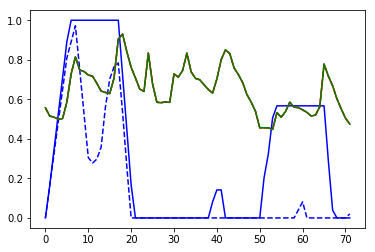

INFO:tensorflow:Restoring parameters from /tmp/tmpz2s3tdd8/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 3day training, day: 80 : -97.128581
INFO:tensorflow:Restoring parameters from /tmp/tmpudsfaqql/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 80 : 82.969267
++++++++++++++difference between 1 day and 3 day training results is 180.097848 ++++


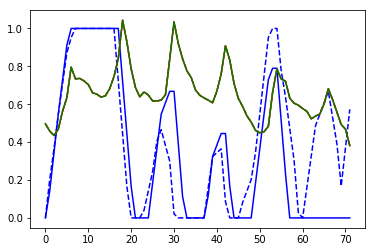

INFO:tensorflow:Restoring parameters from /tmp/tmpac6nlvax/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 3day training, day: 108 : 82.608471
INFO:tensorflow:Restoring parameters from /tmp/tmpe_1kihvk/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 108 : 116.725123
++++++++++++++difference between 1 day and 3 day training results is 34.116653 ++++


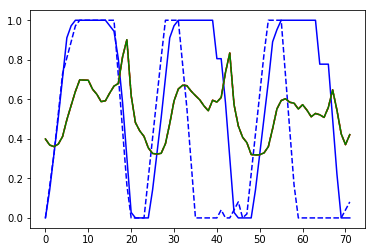

INFO:tensorflow:Restoring parameters from /tmp/tmplqbahpxe/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 3day training, day: 136 : 241.095086
INFO:tensorflow:Restoring parameters from /tmp/tmp930k41ck/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 136 : 325.642741
++++++++++++++difference between 1 day and 3 day training results is 84.547654 ++++


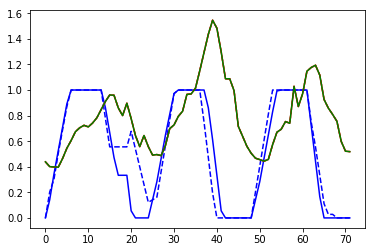

INFO:tensorflow:Restoring parameters from /tmp/tmp68d2p98u/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 3day training, day: 174 : 167.658692
INFO:tensorflow:Restoring parameters from /tmp/tmpvf5z173w/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 174 : 239.277914
++++++++++++++difference between 1 day and 3 day training results is 71.619221 ++++


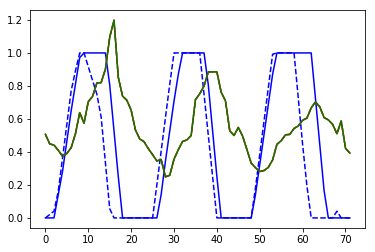

INFO:tensorflow:Restoring parameters from /tmp/tmp64byk0eg/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 3day training, day: 230 : 264.235827
INFO:tensorflow:Restoring parameters from /tmp/tmp7hak3k2u/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 230 : 318.797206
++++++++++++++difference between 1 day and 3 day training results is 54.561379 ++++


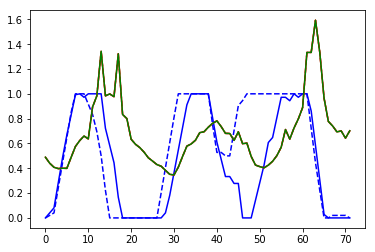

INFO:tensorflow:Restoring parameters from /tmp/tmpjfdql8fs/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 3day training, day: 274 : 147.791119
INFO:tensorflow:Restoring parameters from /tmp/tmp_582txll/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 274 : 243.202387
++++++++++++++difference between 1 day and 3 day training results is 95.411268 ++++


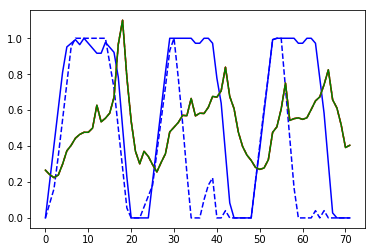

INFO:tensorflow:Restoring parameters from /tmp/tmpd15hnivm/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 3day training, day: 305 : -18.053175
INFO:tensorflow:Restoring parameters from /tmp/tmphow3fi_2/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 305 : 138.384864
++++++++++++++difference between 1 day and 3 day training results is 156.438039 ++++


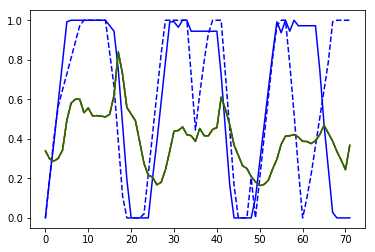

INFO:tensorflow:Restoring parameters from /tmp/tmpxlt2ygci/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 3day training, day: 332 : 17.578079
INFO:tensorflow:Restoring parameters from /tmp/tmpx9afu65q/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 332 : 107.454089
++++++++++++++difference between 1 day and 3 day training results is 89.876011 ++++


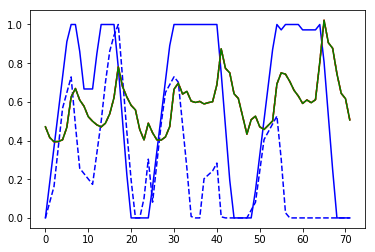

INFO:tensorflow:Restoring parameters from /tmp/tmpcu9wwhyt/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 3day training, day: 350 : 37.474327
INFO:tensorflow:Restoring parameters from /tmp/tmphbw99ms4/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 350 : 179.716402
++++++++++++++difference between 1 day and 3 day training results is 142.242074 ++++


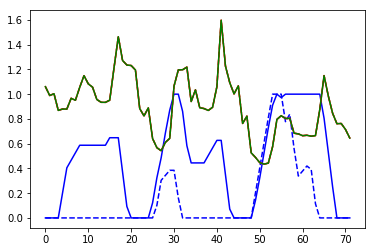

In [6]:
## Compare the effect of different simulation days for training

# should add day 344 for a specific testing purpose?

selectdays = [3,7,12,33,43,62,69,80,91,97,98,108,116,123,126,136,144,153,161,174,192,199,225,230,234,247,261,274,281,287,295,305,313,320,327,332,344,348,357,350,360]
selectdays2 = selectdays[3:41:4]
print ('------------------selectdays2----------------')
print (selectdays2)
#selectdays2 = list (range(90,130))  # April, spring
#selectdays2 = list (range(320,363))  # winter
nsimudays = 3
npricedays = 1
Etini = 0.0
etap = 0.9
etan = 0.81
for istartday in selectdays2:
    #print ('------start day is %d'%(istartday))
    test_actions, test_observations, test_reward, total_reward, pricefulldays = testwith3dayNN(istartday, Etini, etap, etan, nsimudays, npricedays, selectdays2)
    #test_actions_new, test_observations_new, test_reward_new, total_reward_new = testwith1dayNN(istartday, Etini, etap, etan, nsimudays, npricedays, selectdays2)
    
    test_actions_new, test_observations_new, test_reward_new, total_reward_new = \
    testwith1dayNNseparate1dayvaliation(istartday, Etini, etap, etan, 1, npricedays, selectdays2)
    print ('++++++++++++++difference between 1 day and 3 day training results is %f ++++' %(total_reward_new-total_reward))
    
    plt.plot((test_observations[:,22])/4, 'b--')
    plt.plot((test_observations_new[:,22])/4, 'b')
    #plt.show()
    #plt.plot((test_observations[:,47]), 'k--')
    #plt.plot((test_observations_new[:,47]), 'k')
    #plt.show()
    plt.plot((test_observations[:,72]/60), 'r--')
    plt.plot((test_observations_new[:,72]/60), 'r')
    #pricetmp = np.concatenate((pricefulldays[istartday], pricefulldays[istartday+1], pricefulldays[istartday+2]))
    #plt.plot((pricetmp/60), 'g')
    #plt.show()
    #plt.plot(test_reward[:-1]/20)
    plt.show()

In [45]:
test_observations_new.shape

(69, 96)

## test validation with single day simulation, NN with 1 day training

INFO:tensorflow:Restoring parameters from /tmp/tmpjfzimqlh/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 3 : 94.909707


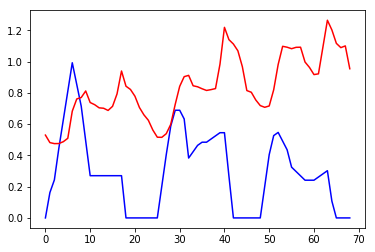

INFO:tensorflow:Restoring parameters from /tmp/tmp33yxzzn5/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 43 : 136.095310


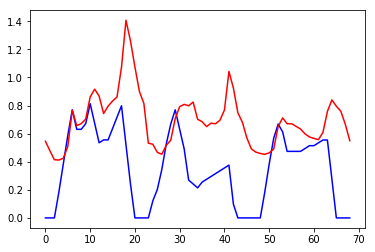

INFO:tensorflow:Restoring parameters from /tmp/tmp_etft1gl/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 91 : 85.771889


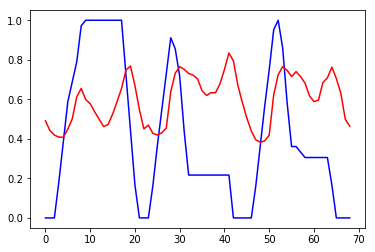

INFO:tensorflow:Restoring parameters from /tmp/tmp_510dsfz/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 116 : 134.150761


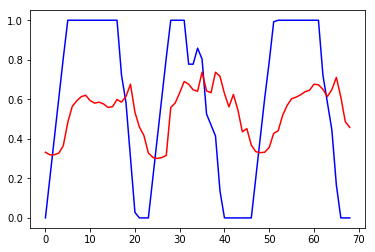

INFO:tensorflow:Restoring parameters from /tmp/tmpbz2615mq/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 144 : 91.259765


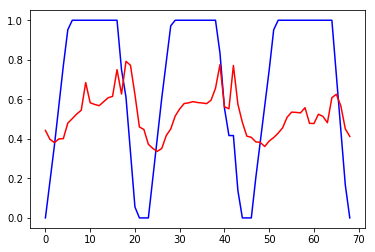

INFO:tensorflow:Restoring parameters from /tmp/tmpyl7dt5xw/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 192 : 581.021429


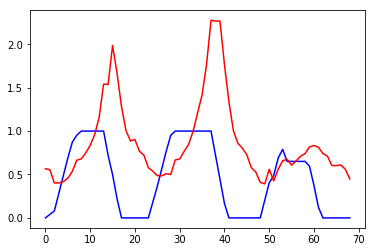

INFO:tensorflow:Restoring parameters from /tmp/tmpcknq14yp/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 234 : 153.624062


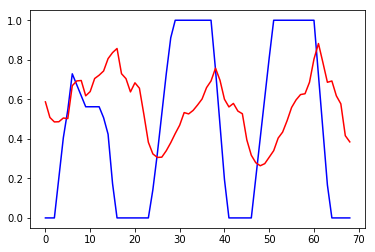

INFO:tensorflow:Restoring parameters from /tmp/tmpvptxpuo_/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 281 : 586.420358


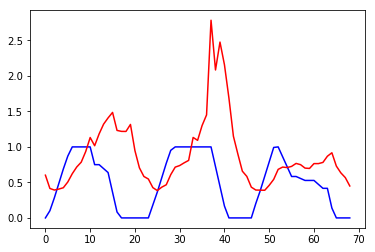

INFO:tensorflow:Restoring parameters from /tmp/tmpgxw5gla5/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 313 : 126.138714


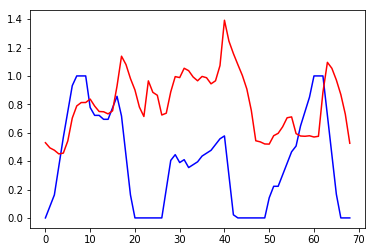

INFO:tensorflow:Restoring parameters from /tmp/tmpguqaitzn/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 345 : 218.221305


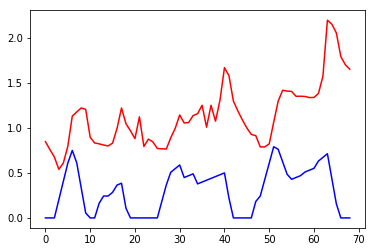

INFO:tensorflow:Restoring parameters from /tmp/tmprj7walb7/model
Check epsilon is: 0.000000
--------------Episode simulation 3 days reward for NN with 1day training,  day: 360 : 206.362891


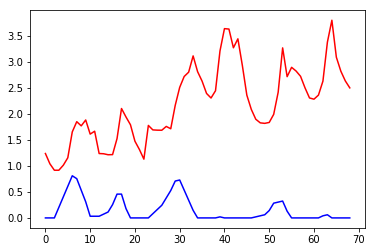

In [18]:
## Compare the effect of different simulation days for training

selectdays = [3,7,12,33,43,62,69,80,91,97,98,108,116,123,126,136,144,153,161,174,192,199,225,230,234,247,261,274,281,287,295,305,313,320,327,332,345,348,357,350,360]
selectdays2 = selectdays[0:41:4]
#selectdays2 = list (range(90,130))  # April, spring
#selectdays2 = list (range(320,363))  # winter
nsimudays = 3
npricedays = 1
Etini = 0.0
etap = 0.9
etan = 0.81

for istartday in selectdays2:
    #print ('------start day is %d'%(istartday))
    #test_actions, test_observations, test_reward, total_reward = testwith3dayNN(istartday, Etini, nsimudays, npricedays, selectdays2)
    #test_actions_new, test_observations_new, test_reward_new, total_reward_new = testwith1dayNN(istartday+2, Etini, etap, etan, 1, npricedays, selectdays2)
    
    test_actions_new, test_observations_new, test_reward_new, total_reward_new = \
    testwith1dayNNseparate1dayvaliation(istartday, Etini, etap, etan, 1, npricedays, selectdays2)
    #print ('++++++++++++++difference between 1 day and 3 day training results is %f ++++' %(total_reward_new-total_reward))
    
    #plt.plot((test_observations[:,22])/4, 'b--')
    plt.plot((test_observations_new[:,22])/4, 'b')
    #plt.show()
    #plt.plot((test_observations[:,47]), 'k--')
    #plt.plot((test_observations_new[:,47]), 'k')
    #plt.show()
    #plt.plot((test_observations[:,72]/60), 'r--')
    plt.plot((test_observations_new[:,72]/60), 'r')
    #plt.show()
    #plt.plot(test_reward[:-1]/20)
    plt.show()

## test special day training results

INFO:tensorflow:Restoring parameters from /tmp/tmp50nc77hn/model
Check epsilon is: 0.000000
--------------Episode simulation 1 days reward for NN with 1day training, day: 361 : 239.294531


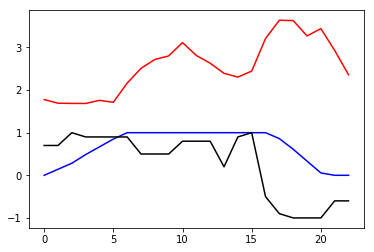

In [28]:
# test train with 1 day simulation NN, Et Ini = 0.0
from baselines import deepq
import baselines.common.tf_util as U
#from SimpleBatteryModelDefnoCappenalty import SimpleBatterySimEnv
#from SimpleBatteryModelDefnoCappenaltyMultiDay import SimpleBatterySimEnv
#from SimpleBatteryModelnoCapAllpriceDef import SimpleBatterySimEnv
from SimpleBatteryModelFinalDef import SimpleBatterySimEnv as SimpleBatterySimEnvNew

def testwithspecial1dayNN(istartday, Etini, etap, etan, nsimudays, npriceday, traindays):
    tf.reset_default_graph()
    
    Lmpfile = '../../TestData/2017_Zonal_LMP_LONGIL.csv'
    #istartday = 12
    
    env = SimpleBatterySimEnvNew(Lmpfile, Etini, etap, etan, istartday, nsimudays, npriceday, traindays)
    
    # this model "simplebattery_model_nolastpenalty_simu1days_smalltrainset4_lr_0.0001_100w.pkl" use old 1 day method to train
    # the training does not train the next two days when given the istarday
    #nn_model = "./previous_model/simplebattery_model_nolastpenalty_BaEtIni0.0_simu1Days_price1Days_specialtrainday361_lr_0.00025_2w.pkl"
    #nn_model = "./previous_model/simplebattery_model_etap0.9_etan0.81_BaEtIni0.0_simu1Days_price1Days_extendsetdays_Moredataset4_lr_0.0005_100w.pkl"
    nn_model = "./previous_model/ubuntu3/simplebattery_model_etap0.9_etan0.81_BaEtIni0.0_simu1Days_price1Days_extendsetdays_Moredataset4_lr_0.00025_200w.pkl"
    
    act = deepq.load(nn_model)
    
    with tf.variable_scope("deepq", reuse=True):
        eps = tf.get_variable("eps")
            
    U.set_value(eps, 0)
    print("Check epsilon is: %f" % U.eval(eps))

    #obs, done = env._validate(1,8,1.0,0.58), False
    episode_rew = 0
    #actions = np.random.randint(low = 0, high = 21, size = (3*24*2+2,1))
    observations = list()
    rewards = list()
    actions = list()
    
    istep = 0
    done = False
    obs = env._validate(istartday)
    
    while not done:
        #action = actions[istep]
        action = act(obs[None])[0]
        
        #print ('action is %d, %s'%(action, type(action)))
        
        obs, rew, done, _ = env.step(action)
        #print ('obs shape:')
        #print (obs.shape)
        observations.append(obs)   
        rewards.append(rew)
        
        episode_rew += rew
        istep += 1
    print("--------------Episode simulation 1 days reward for NN with 1day training, day: %d : %f"%(istartday, episode_rew) )       
    
    return np.array(actions), np.array(observations), np.array(rewards), episode_rew

istartday = 361
test_actions_new, test_observations_new, test_reward_new, total_reward_new = testwithspecial1dayNN(istartday, 0.0, 0.9, 0.81, 1, 1, [1,2])

plt.plot((test_observations_new[:,22])/4, 'b')
plt.plot((test_observations_new[:,47]), 'k')
plt.plot((test_observations_new[:,72]/60), 'r')
plt.show()
